In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing dataset for API

data = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

data.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
772,26-Nov-20,2020-11-26,Recovered,39723,12,1081,72,142,595,80,2454,3,0,4937,111,1302,2267,913,471,218,1067,5970,29,0,1199,4815,158,36,33,131,737,21,467,2179,20,1797,961,73,1518,317,3537,0
773,26-Nov-20,2020-11-26,Deceased,491,0,8,0,0,6,4,18,0,0,91,2,16,25,14,5,3,12,27,5,0,12,65,4,0,0,2,17,0,26,19,0,14,3,0,30,11,52,0
774,27-Nov-20,2020-11-27,Confirmed,41353,7,733,27,149,698,106,1879,2,0,5482,150,1607,2135,830,565,189,1526,3966,44,0,1645,6185,222,52,23,31,594,16,808,3093,37,1442,761,32,2298,530,3489,0
775,27-Nov-20,2020-11-27,Recovered,41177,17,1205,41,160,654,85,3985,8,0,5937,152,1388,2484,490,596,195,1451,4544,100,0,1152,4089,208,82,15,211,908,46,541,2194,40,1494,702,58,2058,391,3496,0
776,27-Nov-20,2020-11-27,Deceased,486,0,6,1,2,5,0,12,0,0,98,1,16,29,13,8,1,12,23,1,0,15,85,7,0,0,1,14,0,27,18,1,12,4,0,23,5,46,0


In [ ]:
#Since we are predicting total cases ('TT') column we don't need state data ,  hence droping out state data

cols = ['Date_YMD','Date','UN','AN','AP',	'AR',	'AS',	'BR',	'CH',	'CT',	'DD',	'DL',	'DN',	'GA',	'GJ',	'HP',	'HR',	'JH', 'JK',	'KA',	'KL',	'LA',	'LD',	'MH',	'ML',	'MN',	'MP',	'MZ',	'NL',	'OR',	'PB',	'PY',	'RJ',	'SK',	'TG',	'TN',	'TR',	'UP',	'UT',	'WB']
data.drop(cols, axis=1, inplace=True)
data = data.set_index('Status')
data.drop(['Recovered','Deceased'],inplace=True)
data = data.reset_index()
data.drop(["Status"],axis=1,inplace= True)
data.tail()

,TT
251,46283
252,45301
253,44404
254,37441
255,44245


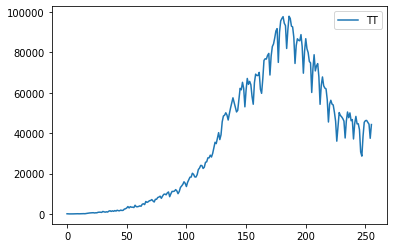

In [ ]:
data.plot()   

In [ ]:
data.shape

(256, 1)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
data_set_scaled = sc.fit_transform(data)

In [ ]:
# Creating a data structure with 10 timesteps and 1 output
timestamp=10

In [ ]:
train=data_set_scaled[:200]
test=data_set_scaled[200-timestamp:]
print(train.shape, test.shape)

(200, 1) (66, 1)


In [ ]:
x_train = []
y_train = []
for i in range(timestamp, len(train)):
    x_train.append(train[i-timestamp:i, 0])
    y_train.append(train[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)

(190, 10) (190,)


In [ ]:
x_test = []
y_test = []
for i in range(timestamp, len(test)):
    x_test.append(test[i-timestamp:i, 0])
    y_test.append(test[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(56, 10) (56,)


In [ ]:
x_train[0]

array([7.15387996e-04, 1.63517256e-04, 4.08793140e-05, 0.00000000e+00,
       2.65715541e-04, 1.63517256e-04, 4.80331940e-04, 6.84728510e-04,
       5.72310397e-04, 9.30004395e-04])

In [ ]:
# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))



In [ ]:
print(x_train.shape,x_test.shape)

(190, 10, 1) (56, 10, 1)


In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 10, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(x_train, y_train, epochs = 54, batch_size = 32)

Epoch 1/54
6/6 [==============================] - 0s 9ms/step - loss: 0.1823
Epoch 2/54
6/6 [==============================] - 0s 8ms/step - loss: 0.0676
Epoch 3/54
6/6 [==============================] - 0s 8ms/step - loss: 0.0455
Epoch 4/54
6/6 [==============================] - 0s 7ms/step - loss: 0.0216
Epoch 5/54
6/6 [==============================] - 0s 7ms/step - loss: 0.0091
Epoch 6/54
6/6 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 7/54
6/6 [==============================] - 0s 7ms/step - loss: 0.0085
Epoch 8/54
6/6 [==============================] - 0s 7ms/step - loss: 0.0060
Epoch 9/54
6/6 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 10/54
6/6 [==============================] - 0s 7ms/step - loss: 0.0061
Epoch 11/54
6/6 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 12/54
6/6 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 13/54
6/6 [==============================] - 0s 7ms/step - loss: 0.

In [ ]:

predictions = regressor.predict(x_test)
predictions = sc.inverse_transform(predictions)

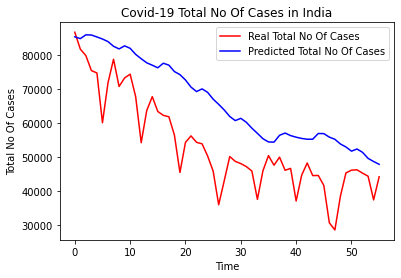

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt
plt.plot(list(data["TT"][200:]), color = 'red', label = 'Real Total No Of Cases')
plt.plot(predictions, color = 'blue', label = 'Predicted Total No Of Cases')
plt.title('Covid-19 Total No Of Cases in India')
plt.xlabel('Time')
plt.ylabel('Total No Of Cases')
plt.legend()
plt.show()

# **Analysis with state data**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
states=list(data.columns)[3:]
statuses=["Recovered", "Decreased", "Confirm"]

**Select the state for which you want to see the data.**

In [ ]:
state = 'TT' #@param ['TT','AN','AP','AR','AS','BR','CH','CT','DN','DD','DL','GA','GJ','HR','HP','JK','JH','KA','KL','LA','LD','MP','MH','MN','ML','MZ','NL','OR','PY','PB','RJ','SK','TN','TG','TR','UP','UT','WB','UN'] {allow-input: false}


In [ ]:
cols = ['TT','Date_YMD','Date','UN','AN','AP',	'AR',	'AS',	'BR',	'CH',	'CT',	'DD',	'DL',	'DN',	'GA',	'GJ',	'HP',	'HR',	'JH', 'JK',	'KA',	'KL',	'LA',	'LD',	'MH',	'ML',	'MN',	'MP',	'MZ',	'NL',	'OR',	'PB',	'PY',	'RJ',	'SK',	'TG',	'TN',	'TR',	'UP',	'UT',	'WB']
cols.remove(state)

In [ ]:

data = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
data_confirm=data.drop(cols, axis=1)
data_confirm = data_confirm.set_index('Status')
data_confirm.drop(['Recovered','Deceased'],inplace=True)
data_confirm = data_confirm.reset_index()
data_confirm.drop(["Status"],axis=1,inplace= True)
# data_confirm.tail()

data = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
data_recovered=data.drop(cols, axis=1)
data_recovered = data_recovered.set_index('Status')
data_recovered.drop(['Confirmed','Deceased'],inplace=True)
data_recovered = data_recovered.reset_index()
data_recovered.drop(["Status"],axis=1,inplace= True)
# data_recovered.tail()

data = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')
data_decrease=data.drop(cols, axis=1)
data_decrease = data_decrease.set_index('Status')
data_decrease.drop(['Recovered','Confirmed'],inplace=True)
data_decrease = data_decrease.reset_index()
data_decrease.drop(["Status"],axis=1,inplace= True)
# data_decrease.tail()

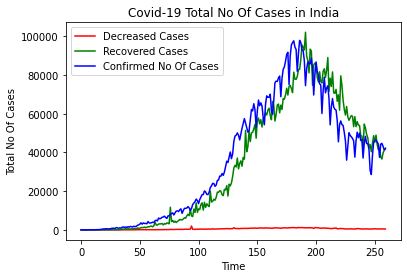

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt
plt.plot(data_decrease, color = 'red', label = 'Decreased Cases')
plt.plot(data_recovered, color = 'green', label = 'Recovered Cases')
plt.plot(data_confirm, color = 'blue', label = 'Confirmed No Of Cases')
plt.title('Covid-19 Total No Of Cases in India')
plt.xlabel('Time')
plt.ylabel('Total No Of Cases')
plt.legend()
plt.show()

In [ ]:
120+5.2*1980+3.5(1980**2)


TypeError: ignored

In [ ]:
x = lambda a : 114+7.5*a+3.5*(a**2)

In [ ]:
x(1984)

13791890.0

In [ ]:
l=[14, 16, 8 ,12, 11, 9, 14]

In [ ]:
avg=sum(l)/7
avg

12.0

In [ ]:
for i in range(len(l)):
  l[i]=(l[i]-avg)**2

l

[4.0, 16.0, 16.0, 0.0, 1.0, 9.0, 4.0]

In [ ]:
sum(l)/avg

4.166666666666667